In [6]:
%matplotlib widget
from main import *
import sympy as sp
from sympy import Heaviside, sin, cos
sp.init_printing()

In [7]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [8]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V_t = sin(t)),
                    Diode("D1", {"Vp" : "V1", "Vn" : "V2"}),
                    Resistor("R1", {"V1" : "V2", "V2" : "Vc"}, R = 1e3),
                    Resistor("R2", {"V1" : "Vc", "V2" : Gnd}, R = 1e6),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 0, C = 1e-3),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': sin(t)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.001, 'V0': 0}}}

In [9]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [10]:
model = solveLaplace(compiled, 10, 0.1, debugLog = True)

{I3_1, I2_0, I3_0, V1, I4_0, I4_1, I1_1, V2, I2_1, I0_0, I1_0, V0, I0_1}
[Eq(I0_0 + I1_0, 0), Eq(I2_1 + I3_0 + I4_0, 0), Eq(I1_1 + I2_0, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': sin(t)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}}, 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000000.0}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.001, 'V0': 0}}}
{'Vg': {'V+': V0, 'V-': 0}, 'D1': {'Vp': V0, 'Vn': V2}, 'R1': {'V1': V2, 'V2': V1}, 'R2': {'V1': V1, 'V2': 0}, 'C1': {'V1': V1, 'V2': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'D1': {'Vp': I1_0, 'Vn': I1_1}, 'R1': {'V1': I2_0, 'V2': I2_1}, 'R2': {'V1': I3_0, 'V2': I3_1}, 'C1': {'V1': I4_0, 'V2': I4_1}}
**************

_CoeffExpValueError: expr not of form a*x**b: 1000.00000000000

In [ ]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg"]["V+"]
Id = compiled["currents"]["D1"]["Vp"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vc = compiled["nodes"]["Vc"]

{'V1': V0, 'Vc': V1, 'V2': V2}


In [ ]:
printModel(model, var=t, important={Vin, Vc})

{('R1', ''), ('R2', ''), ('D1', 'Cut'), ('C1', ''), ('Vg', '')}
t ∈ Interval.Ropen(0, 0.643502807617187)
{V1: 0, V0: 1.0*sin(t)}
{V1: 0, V0: 0}
{V1: 0, V0: 0.600001359058257}
-------------------------------------
{('R1', ''), ('D1', 'Fwd'), ('R2', ''), ('C1', ''), ('Vg', '')}
t ∈ Interval.Ropen(0.643502807617187, 1.91906433105469)
{V1: 0.799797785876941*sin(t) + 0.598602958314066*cos(t) - 0.599400599400599 + 0.000797641086533407*exp(-1001.0*t), V0: 0.799998980704504*sin(t) + 0.600001359058257*cos(t)}
{V1: 0.359360915595303, V0: 0.960000951335845}
{V1: -0.0519039265502116, V0: 0.547208556339275}
-------------------------------------
{('R1', ''), ('R2', ''), ('D1', 'Cut'), ('C1', ''), ('Vg', '')}
t ∈ Interval.Ropen(1.91906433105469, 6.92953796386718)
{V1: 0.339965226843967*exp(-t), V0: -0.341270304417897*sin(t) + 0.939965201123167*cos(t)}
{V1: 0.0498879258895093, V0: -0.641564420659066}
{V1: 0.000332639943250553, V0: 0.544821024344302}
-------------------------------------
{('R1', ''), (

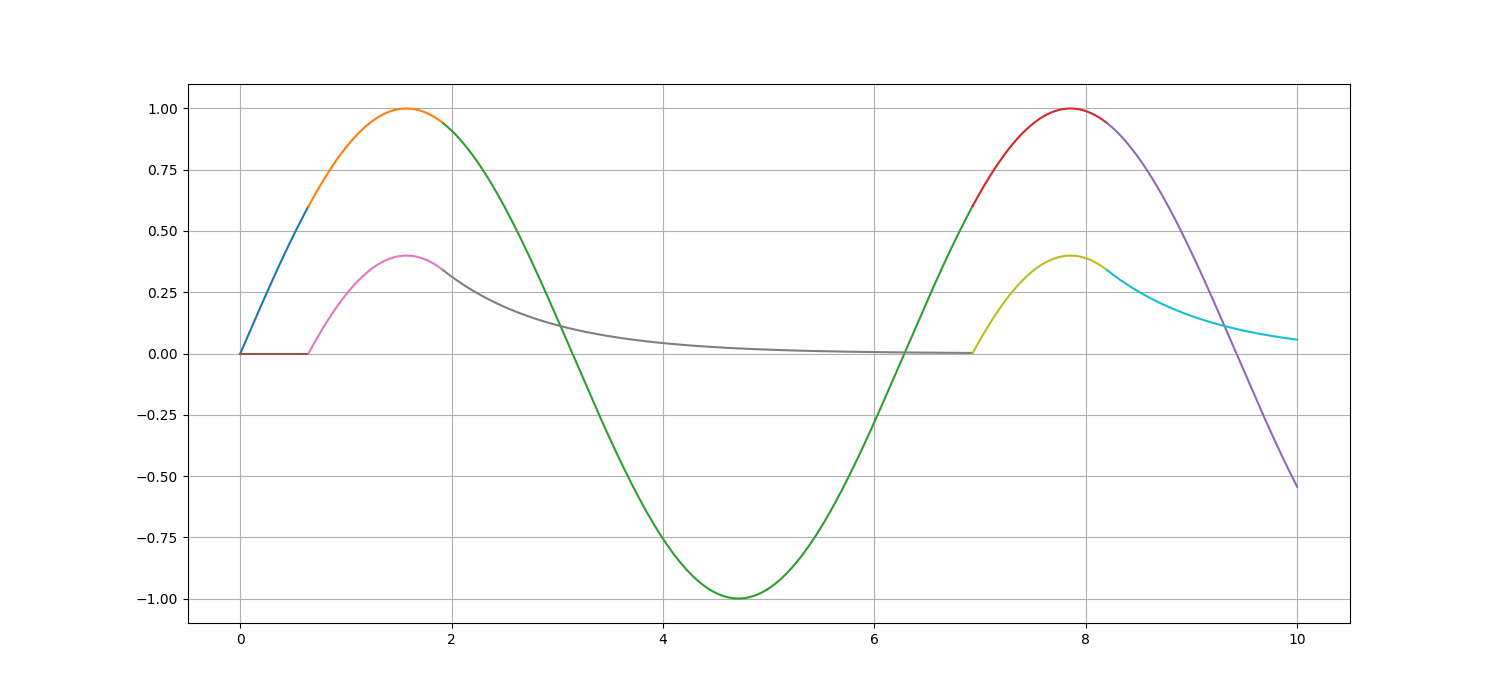

In [ ]:
measurments =   [   
                    (Vin, "Vin(t)"),
                    (Vc, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

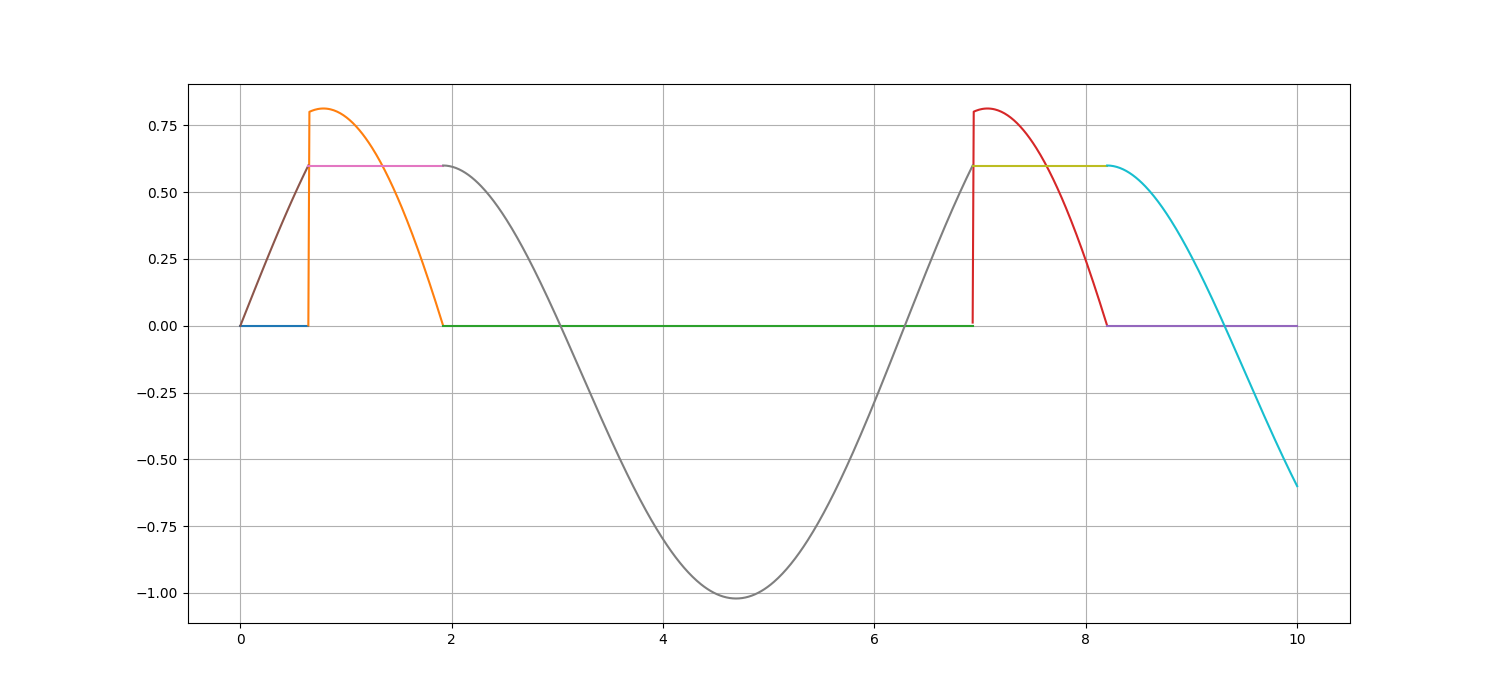

In [ ]:
measurments =   [   
                    (1e6 * Id, "Id(t)"),
                    (Vd, "Vd(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()